In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime

In [462]:
df = pd.read_csv('train.csv')

In [31]:
cc_nums = df['cc_num'].unique()

num_of_frauds_per_cc = []
for cc_num in cc_nums:
    df_cc_num = df[df['cc_num'] == cc_num]
    num_of_frauds_per_cc.append({'cc_num' : cc_num, "is_frauds" : df_cc_num['is_fraud'].sum()})

In [123]:
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the Haversine distance between two points on the Earth.
    Args:
        lat1, lon1: Latitude and longitude of the first location (cardholder).
        lat2, lon2: Latitude and longitude of the second location (merchant).
    Returns:
        Distance in kilometers.
    """
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r


In [117]:
num_of_frauds_per_cc = sorted(num_of_frauds_per_cc, key=lambda x: x['is_frauds'], reverse=True)

frauds_df = df[df['cc_num'] == num_of_frauds_per_cc[0]['cc_num']]
lat1 = frauds_df['lat'].values
lon1 = frauds_df['long'].values
lat2 = frauds_df['merch_lat'].values
lon2 = frauds_df['merch_long'].values

distances = []
for i in range(len(lat1)):
    distances.append(haversine(lat1[i], lon1[i], lat2[i], lon2[i]))

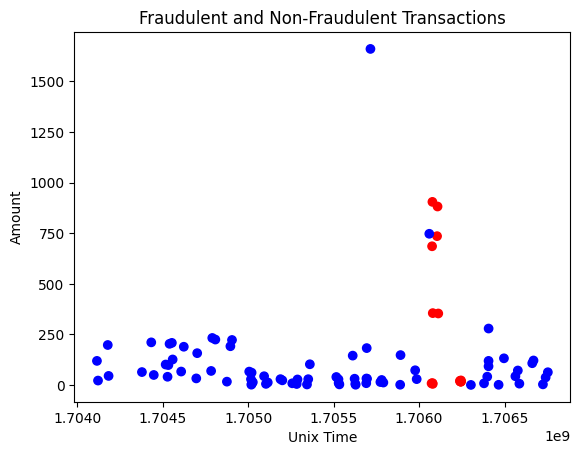

In [91]:
colors = frauds_df['is_fraud'].map({1: 'red', 0: 'blue'})
plt.scatter(frauds_df['unix_time'], frauds_df['amt'], c=colors)
plt.xlabel('Unix Time')
plt.ylabel('Amount')
plt.title('Fraudulent and Non-Fraudulent Transactions')
plt.show()

In [83]:
df['age'] = 2024 - df['dob'].apply(lambda x: int(x.split('-')[0]))

0    41
1    48
2    25
3    94
4    73
Name: age, dtype: int64

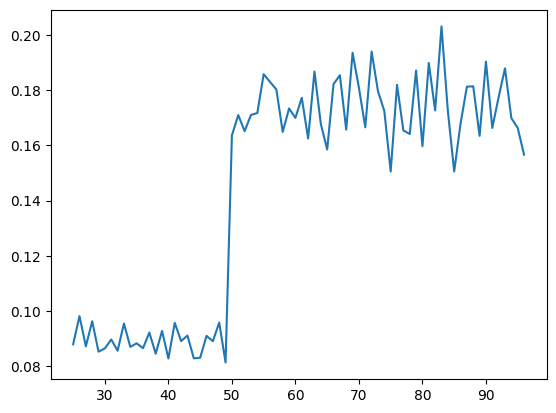

In [89]:
average_frauds_per_age_group = df.groupby('age')['is_fraud'].mean()
plt.plot(average_frauds_per_age_group)

In [93]:
df['category'].unique()

array(['misc_pos', 'grocery_pos', 'entertainment', 'health_fitness',
       'grocery_net', 'shopping_net', 'gas_transport', 'shopping_pos',
       'kids_pets', 'misc_net', 'personal_care', 'travel', 'home',
       'food_dining'], dtype=object)

In [97]:
fraud_percentage_per_category = df.groupby('category')['is_fraud'].mean() * 100
fraud_counts_per_category = df.groupby('category')['is_fraud'].sum()
total_counts_per_category = df['category'].value_counts()

fraud_stats_per_category = pd.DataFrame({
    'fraud_percentage': fraud_percentage_per_category,
    'total_frauds': fraud_counts_per_category,
    'total_items': total_counts_per_category
})

print(fraud_stats_per_category)

                fraud_percentage  total_frauds  total_items
category                                                   
entertainment           6.416394          1528        23814
food_dining             5.166096          1297        25106
gas_transport          11.727167          3124        26639
grocery_net             3.670299           586        15966
grocery_pos            21.834799          8792        40266
health_fitness          4.945729          1048        21190
home                    4.461736          1531        34314
kids_pets               4.849291          1567        32314
misc_net               25.871731          4986        19272
misc_pos                7.333775          1660        22635
personal_care           5.839040          1586        27162
shopping_net           26.310744          8782        33378
shopping_pos           13.646853          5145        37701
travel                  6.093550           667        10946


In [104]:
# Bucket the city population
# Plot whether gender has an effect on fraud rates
fraud_percentage_per_gender = df.groupby('gender')['is_fraud'].mean() * 100
fraud_counts_per_gender = df.groupby('gender')['is_fraud'].sum()
total_counts_per_gender = df['gender'].value_counts()

fraud_stats_per_gender = pd.DataFrame({
    'fraud_percentage': fraud_percentage_per_gender,
    'total_frauds': fraud_counts_per_gender,
    'total_items': total_counts_per_gender
})

fraud_stats_per_gender

fraud_percentage  total_frauds  total_items
gender                                             
F              10.589356         23906       225755
M              12.689378         18393       144948

In [463]:
df['ma_2'] = df.groupby('cc_num')['amt'].transform(lambda x: x.rolling(window=2).mean())

/var/folders/lt/h9nxt46j4r7dc2xptjh4w0300000gn/T/ipykernel_80847/292252843.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frauds_df['date'] = pd.to_datetime(frauds_df['unix_time'], unit='s', utc=True)


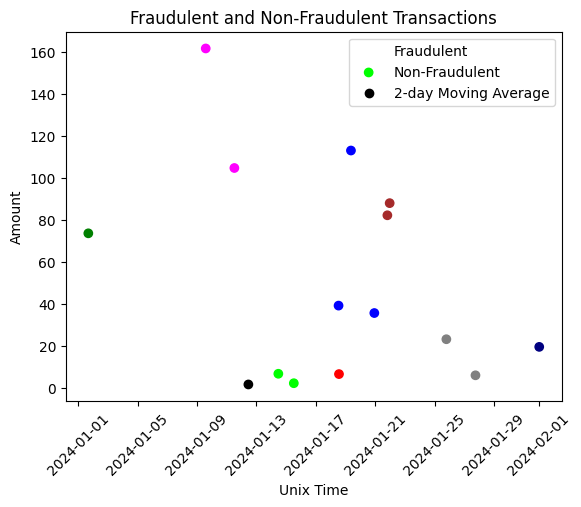

In [465]:
df_by_cc = df.groupby('cc_num')

frauds_df = df_by_cc.get_group(num_of_frauds_per_cc[-1000]['cc_num'])
frauds_df['date'] = pd.to_datetime(frauds_df['unix_time'], unit='s', utc=True)


frauds = frauds_df[frauds_df['is_fraud'] == 1]
non_frauds = frauds_df[frauds_df['is_fraud'] == 0]

# Define colors based on the category
frauds['color'] = frauds['category'].map({
    'entertainment': 'red',
    'food_dining': 'blue',
    'gas_transport': 'green',
    'grocery_net': 'purple',
    'grocery_pos': 'orange',
    'health_fitness': 'brown',
    'home': 'pink',
    'kids_pets': 'gray',
    'misc_net': 'cyan',
    'misc_pos': 'magenta',
    'personal_care': 'yellow',
    'shopping_net': 'black',
    'shopping_pos': 'lime',
    'travel': 'navy'
})

non_frauds['color'] = non_frauds['category'].map({
    'entertainment': 'red',
    'food_dining': 'blue',
    'gas_transport': 'green',
    'grocery_net': 'purple',
    'grocery_pos': 'orange',
    'health_fitness': 'brown',
    'home': 'pink',
    'kids_pets': 'gray',
    'misc_net': 'cyan',
    'misc_pos': 'magenta',
    'personal_care': 'yellow',
    'shopping_net': 'black',
    'shopping_pos': 'lime',
    'travel': 'navy'
})

# Scatter plot for frauds
plt.scatter(frauds['date'], frauds['amt'], c=frauds['color'], marker='x', label='Fraudulent')

# Scatter plot for non-frauds
plt.scatter(non_frauds['date'], non_frauds['amt'], c=non_frauds['color'], marker='o', label='Non-Fraudulent')
plt.plot(frauds['date'], frauds['ma_2'], color='black', label='2-day Moving Average')
# Add labels, legend, and title
plt.xlabel('Unix Time')
plt.ylabel('Amount')
plt.title('Fraudulent and Non-Fraudulent Transactions')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [294]:

total = []
for i in range(len(num_of_frauds_per_cc)):
        
    frauds_df = df_by_cc.get_group(num_of_frauds_per_cc[i]['cc_num'])
    frauds_df['date'] = pd.to_datetime(frauds_df['unix_time'], unit='s', utc=True)

    frauds_df = frauds_df.sort_values(by='unix_time')

    # frauds_df.loc[:, 'avg_amt_sig'] = abs((frauds_df['amt'] - frauds_df['amt'].mean()) / frauds_df['amt'].std()) > 1.96

    # T_avg_amt_sig = frauds_df[frauds_df['avg_amt_sig'] == True]
    # F_avg_amt_sig = frauds_df[frauds_df['avg_amt_sig'] == False]

    # frauds_df.loc[:, 'prev_category_same'] = frauds_df['category'].shift(-1) == frauds_df['category']
    # frauds_df.loc[:, 'next_category_same'] = frauds_df['category'].shift(1) == frauds_df['category']
    # frauds_df.loc[:, 'both_category_different'] = frauds_df['prev_category_same'] | frauds_df['next_category_same']

    # T_both_cat_diff = frauds_df[frauds_df['both_category_different'] == False]

    # T_both_cat_diff_avg_amt_sig = frauds_df[(frauds_df['avg_amt_sig'] == True) & (frauds_df['both_category_different'] == False)]['is_fraud']

    # frauds_df.loc[:, 'avg_amt_sig'] = abs((frauds_df['amt'] - frauds_df['amt'].mean()) / frauds_df['amt'].std()) > 1.96
    # T_avg_amt_sig = frauds_df[frauds_df['avg_amt_sig'] == True]['unix_time']
    # T_avg_amt_sig

    # frauds_df['time_diff'] = frauds_df['unix_time'].diff()

    # average_time_diff_0 = frauds_df.loc[frauds_df['is_fraud'] == 0, 'time_diff'].mean()
    # average_time_diff_1 = frauds_df.loc[frauds_df['is_fraud'] == 1, 'time_diff'].mean()

    # average_time_diff_0, average_time_diff_1

    # Calculate the time difference between consecutive frauds

    mintime = frauds_df[frauds_df['is_fraud'] == 1]['unix_time'].min()
    maxtime = frauds_df[frauds_df['is_fraud'] == 1]['unix_time'].max()

    time_diff = maxtime - mintime

    if time_diff > 0:
        total.append(time_diff / 60 / 60 / 24) 


/var/folders/lt/h9nxt46j4r7dc2xptjh4w0300000gn/T/ipykernel_80847/3529479010.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frauds_df['date'] = pd.to_datetime(frauds_df['unix_time'], unit='s', utc=True)
/var/folders/lt/h9nxt46j4r7dc2xptjh4w0300000gn/T/ipykernel_80847/3529479010.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frauds_df['date'] = pd.to_datetime(frauds_df['unix_time'], unit='s', utc=True)
/var/folders/lt/h9nxt46j4r7dc2xptjh4w0300000gn/T/ipykernel_80847/3529479010.py:5: SettingWithCopyW

In [295]:
total = np.array(total)
total.mean(), total.std(), total.max(), total.min()

(1.291880935477367,
 0.7313991921141182,
 1.9996064814814816,
 5.7870370370370366e-05)

In [297]:
df['date'] = pd.to_datetime(df['unix_time'], unit='s', utc=True)
df['hour'] = df['date'].dt.hour

df['date'].min(), df['date'].max()

(Timestamp('2024-01-01 05:00:01+0000', tz='UTC'),
 Timestamp('2024-02-01 04:59:41+0000', tz='UTC'))

In [455]:
test = pd.read_csv('test.csv')
test['date'] = pd.to_datetime(test['unix_time'], unit='s', utc=True)
test['hour'] = test['date'].dt.hour

test['date'].min(), test['date'].max()

(Timestamp('2024-01-01 05:00:06+0000', tz='UTC'),
 Timestamp('2024-02-01 04:59:25+0000', tz='UTC'))

(5.869656089682691, 5.249043488908784, 45, 1)

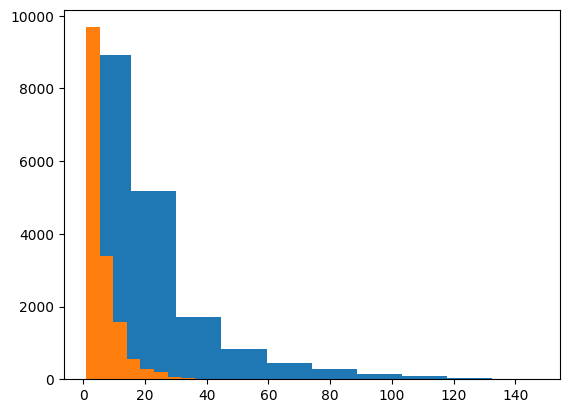

In [331]:
test_by_cc = test.groupby('cc_num')

counts_train = df_by_cc.size().reset_index(name='counts').sort_values(by='counts', ascending=False)['counts'].values
counts_test = test_by_cc.size().reset_index(name='counts').sort_values(by='counts', ascending=False)['counts'].values

plt.hist(counts_train)
plt.hist(counts_test)

counts_train = np.array(counts_train)
counts_test = np.array(counts_test)

counts_train.mean(), counts_train.std(), counts_train.max(), counts_train.min()
counts_test.mean(), counts_test.std(), counts_test.max(), counts_test.min()

In [428]:
# Features
df.sort_values(by='unix_time', inplace=True)
df['avg_amt_sig'] = df_by_cc['amt'].transform(lambda x: abs((x - x.mean()) / x.std()) > 1.96)

df['prev_category_same'] = df_by_cc['category'].shift(-1) == df['category']
df['next_category_same'] = df_by_cc['category'].shift(1) == df['category']
df['both_category_different'] = df['prev_category_same'] | df['next_category_same']

# Averege time of the transaction per cc and category
# Likely hood of being in a cluster
df['avg_time'] = df.groupby(['cc_num', 'category'])['unix_time'].transform('mean')
df['cat_time_diff'] = df['unix_time'] - df['avg_time'] 

# Average time of the transaction per cc
df['avg_time_cc'] = df.groupby('cc_num')['unix_time'].diff().mean()
df['time_between_last_transaction'] = df['unix_time'] - df['unix_time'].shift(1)
df['time_between_last_transaction'].fillna(0, inplace=True)
df['diff_time'] = df['avg_time_cc'] - df['time_between_last_transaction']
df['hour_of_day'] = df['date'].dt.hour

# Binary flag for unusual frequency (transactions within a short interval, e.g., 5 minutes)
# df['unusual_frequency'] = df['time_since_last_trans'] < 300


/var/folders/lt/h9nxt46j4r7dc2xptjh4w0300000gn/T/ipykernel_80847/3511675266.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['time_between_last_transaction'].fillna(0, inplace=True)


In [453]:


frauds_above_threshold = df[(abs(df['cat_time_diff']) > 400000) & (df['avg_amt_sig'] == True) & (abs(df['diff_time']) > 100000)]

# df['diff_time'].describe()

In [454]:
print(frauds_above_threshold[frauds_above_threshold['is_fraud'] == 1].shape[0], frauds_above_threshold.shape[0])
frauds_above_threshold[frauds_above_threshold['is_fraud'] == 1].shape[0] / frauds_above_threshold.shape[0]

3811 3918


0.9726901480347115

In [459]:
test['cc_num'].isin(df['cc_num']).sum() / test.shape[0]

0.9983706677025336